# Projeto de Análise de Dados - Notas do Enem 2021 de Pernambuco

### Disciplina: Tópicos Avançados em Gerencimento de Dados e Informações
### Alunos: Maria Teresa e Victor Amarante


Este projeto de ciência de dados visa entender um pouco mais sobre o comportamento das notas dos vestibulandos do estado de Pernambuco no ano de 2021. A base de dados é pública e foi divulgada no site do Inep. Mais informações sobre a base de dados no link abaixo.

> [Microdados do Enem 2021](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)

## Modelos de Regressão

> O objetivo dessa segunda parte do projeto é fazer com que a máquina acerte a nota final no vestibular baseada nas informações dos vestibulandos.

## Load libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df = pd.read_csv('df_enem.csv', sep=';', encoding='iso-8859-1')

## View data

In [3]:
df

,Unnamed: 0,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,mun,NO_MUNICIPIO_PROVA,IDIOMA,...,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS,PRESENCA
0,0,18 anos,M,Preta,Estou cursando e concluirei o EM em 2021,Público,Urbana,2604106,Caruaru,Inglês,...,524.7,456.4,120.0,120.0,120.0,140.0,140.0,640.0,564.96,4
1,1,18 anos,M,Branca,Estou cursando e concluirei o EM em 2021,Público,Não Consta,2602605,Brejo da Madre de Deus,Inglês,...,453.8,421.4,80.0,120.0,80.0,140.0,120.0,540.0,283.04,2
2,2,18 anos,F,Parda,Estou cursando e concluirei o EM em 2021,Público,Urbana,2612208,Salgueiro,Espanhol,...,498.3,459.2,120.0,120.0,120.0,120.0,20.0,500.0,494.80,4
3,3,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,2604106,Caruaru,Espanhol,...,480.8,458.0,120.0,120.0,120.0,120.0,100.0,580.0,478.34,4
4,4,Entre 31 e 35 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,2607901,Jaboatão dos Guararapes,Espanhol,...,595.1,541.9,120.0,120.0,120.0,120.0,60.0,540.0,535.18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,5033,18 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,2604007,Carpina,Espanhol,...,531.6,580.1,140.0,180.0,160.0,160.0,160.0,800.0,562.14,4
5034,5034,22 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,2611606,Recife,Inglês,...,624.6,571.6,160.0,200.0,160.0,160.0,180.0,860.0,657.68,4
5035,5035,Entre 26 e 30 anos,F,Preta,Já concluí o EM,Não respondeu,Não Consta,2611606,Recife,Inglês,...,521.3,466.3,120.0,160.0,120.0,120.0,100.0,620.0,506.22,4
5036,5036,18 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,2614105,Sertânia,Espanhol,...,365.7,451.3,120.0,120.0,80.0,100.0,40.0,460.0,424.56,4


## Clean dataset

In [4]:
del df['Unnamed: 0']

In [5]:
df.head()

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,mun,NO_MUNICIPIO_PROVA,IDIOMA,STATUS DA REDAÇÃO,...,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS,PRESENCA
0,18 anos,M,Preta,Estou cursando e concluirei o EM em 2021,Público,Urbana,2604106,Caruaru,Inglês,Sem problemas,...,524.7,456.4,120.0,120.0,120.0,140.0,140.0,640.0,564.96,4
1,18 anos,M,Branca,Estou cursando e concluirei o EM em 2021,Público,Não Consta,2602605,Brejo da Madre de Deus,Inglês,Sem problemas,...,453.8,421.4,80.0,120.0,80.0,140.0,120.0,540.0,283.04,2
2,18 anos,F,Parda,Estou cursando e concluirei o EM em 2021,Público,Urbana,2612208,Salgueiro,Espanhol,Sem problemas,...,498.3,459.2,120.0,120.0,120.0,120.0,20.0,500.0,494.80,4
3,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,2604106,Caruaru,Espanhol,Sem problemas,...,480.8,458.0,120.0,120.0,120.0,120.0,100.0,580.0,478.34,4
4,Entre 31 e 35 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,2607901,Jaboatão dos Guararapes,Espanhol,Sem problemas,...,595.1,541.9,120.0,120.0,120.0,120.0,60.0,540.0,535.18,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FAIXA ETÁRIA           5038 non-null   object 
 1   SEXO                   5038 non-null   object 
 2   COR/RAÇA               5038 non-null   object 
 3   SITUAÇÃO DE CONCLUSÃO  5038 non-null   object 
 4   TIPO DE ESCOLA         5038 non-null   object 
 5   LOCALIZAÇÃO DA ESCOLA  5038 non-null   object 
 6   mun                    5038 non-null   int64  
 7   NO_MUNICIPIO_PROVA     5038 non-null   object 
 8   IDIOMA                 5038 non-null   object 
 9   STATUS DA REDAÇÃO      5038 non-null   object 
 10  RENDA                  5038 non-null   float64
 11  INTERNET               5038 non-null   object 
 12  NOTA_CN                5038 non-null   float64
 13  NOTA_MT                5038 non-null   float64
 14  NOTA_CH                5038 non-null   float64
 15  NOTA

In [7]:
df['FAIXA ETÁRIA'] = df['FAIXA ETÁRIA'].astype('category')
df['SEXO'] = df['SEXO'].astype('category')
df['COR/RAÇA'] = df['COR/RAÇA'].astype('category')
df['SITUAÇÃO DE CONCLUSÃO'] = df['SITUAÇÃO DE CONCLUSÃO'].astype('category')
df['TIPO DE ESCOLA'] = df['TIPO DE ESCOLA'].astype('category')
df['LOCALIZAÇÃO DA ESCOLA'] = df['LOCALIZAÇÃO DA ESCOLA'].astype('category')
df['NO_MUNICIPIO_PROVA'] = df['NO_MUNICIPIO_PROVA'].astype('category')
df['IDIOMA'] = df['IDIOMA'].astype('category')
df['STATUS DA REDAÇÃO'] = df['STATUS DA REDAÇÃO'].astype('category')
df['INTERNET'] = df['INTERNET'].astype('category')
df['RENDA'] = df['RENDA'].astype('category')

In [8]:
df.isnull().sum()

FAIXA ETÁRIA             0
SEXO                     0
COR/RAÇA                 0
SITUAÇÃO DE CONCLUSÃO    0
TIPO DE ESCOLA           0
LOCALIZAÇÃO DA ESCOLA    0
mun                      0
NO_MUNICIPIO_PROVA       0
IDIOMA                   0
STATUS DA REDAÇÃO        0
RENDA                    0
INTERNET                 0
NOTA_CN                  0
NOTA_MT                  0
NOTA_CH                  0
NOTA_LC                  0
NOTA_COMP1               0
NOTA_COMP2               0
NOTA_COMP3               0
NOTA_COMP4               0
NOTA_COMP5               0
NOTA_REDACAO             0
NOTAS                    0
PRESENCA                 0
dtype: int64

## EDA

In [9]:
df.describe()

,mun,NOTA_CN,NOTA_MT,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS,PRESENCA
count,5.038000e+03,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.00000,5038.000000,5038.000000
mean,2.608821e+06,482.295508,524.468547,508.989831,492.442692,117.648698,139.869481,115.462530,128.174815,115.418596,616.57412,515.616554,3.906312
std,4.073599e+03,77.230596,107.256564,96.021467,78.897466,34.539284,46.483088,37.321705,39.929524,59.494668,193.76855,103.612505,0.431944
min,2.600054e+06,0.000000,354.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,66.020000,2.000000
25%,2.605707e+06,424.325000,438.125000,435.700000,438.325000,100.000000,120.000000,100.000000,120.000000,80.000000,520.00000,455.800000,4.000000
50%,2.610608e+06,470.650000,500.350000,506.750000,495.100000,120.000000,120.000000,120.000000,120.000000,120.000000,600.00000,513.510000,4.000000
75%,2.611606e+06,531.575000,596.900000,577.675000,546.350000,140.000000,180.000000,140.000000,160.000000,160.000000,740.00000,581.195000,4.000000
max,2.616407e+06,778.600000,953.100000,832.500000,740.300000,200.000000,200.000000,200.000000,200.000000,200.000000,980.00000,833.440000,6.000000


### Quantitative variables

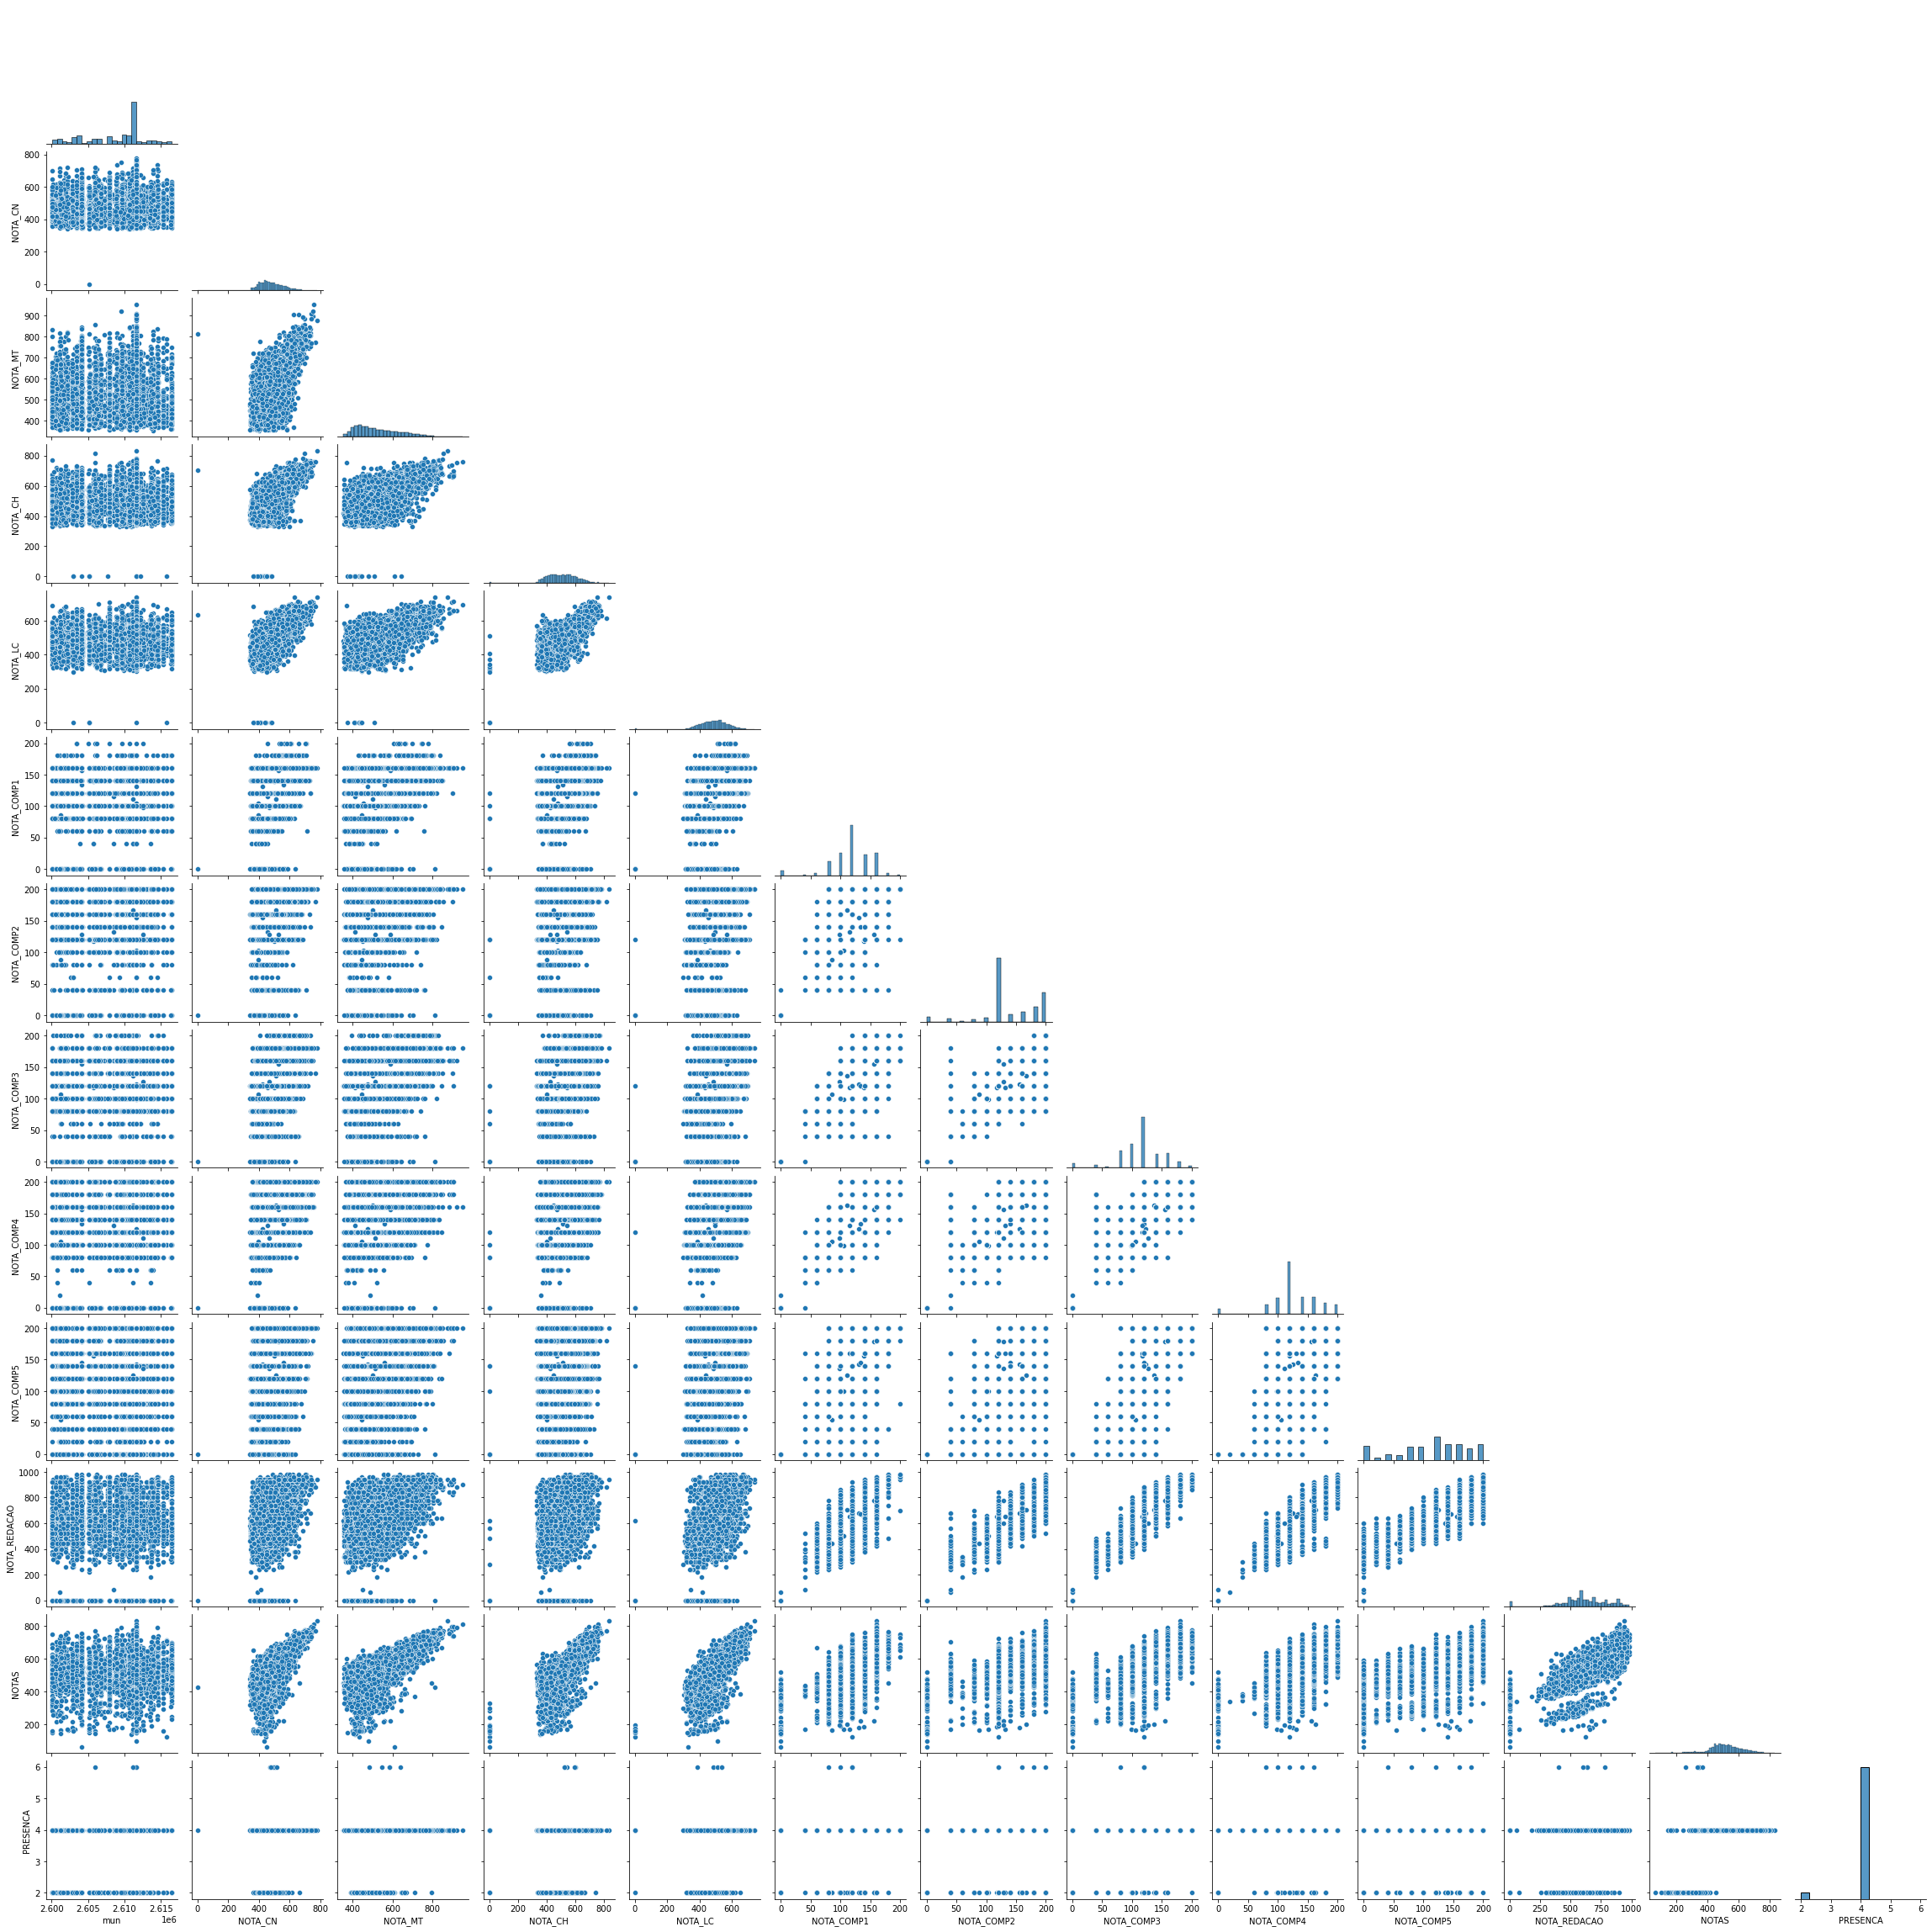

In [10]:
sns.pairplot(df, corner=True);

### Qualitative variables

In [11]:
df["FAIXA ETÁRIA"].value_counts().head()

18 anos               1398
17 anos                998
19 anos                734
20 anos                450
Entre 26 e 30 anos     266
Name: FAIXA ETÁRIA, dtype: int64

In [12]:
df["SEXO"].value_counts()

F    3084
M    1954
Name: SEXO, dtype: int64

In [13]:
df["COR/RAÇA"].value_counts()

Parda            2466
Branca           1687
Preta             580
Não declarado     114
Amarela           110
Indígena           81
Name: COR/RAÇA, dtype: int64

In [14]:
df["SITUAÇÃO DE CONCLUSÃO"].value_counts()

Já concluí o EM                             2806
Estou cursando e concluirei o EM em 2021    2216
Não concluí e não estou cursando o EM         16
Name: SITUAÇÃO DE CONCLUSÃO, dtype: int64

In [15]:
df["TIPO DE ESCOLA"].value_counts()

Não respondeu    2822
Público          1825
Privada           391
Name: TIPO DE ESCOLA, dtype: int64

In [16]:
df["LOCALIZAÇÃO DA ESCOLA"].value_counts()

Não Consta    3556
Urbana        1427
Rural           55
Name: LOCALIZAÇÃO DA ESCOLA, dtype: int64

In [17]:
df["NO_MUNICIPIO_PROVA"].value_counts().head()

Recife                     1186
Petrolina                   311
Jaboatão dos Guararapes     250
Caruaru                     219
Paulista                    198
Name: NO_MUNICIPIO_PROVA, dtype: int64

In [18]:
df["IDIOMA"].value_counts()

Inglês      2683
Espanhol    2355
Name: IDIOMA, dtype: int64

In [19]:
df["STATUS DA REDAÇÃO"].value_counts()

Sem problemas                      4849
Em Branco                            79
Fuga ao tema                         58
Cópia Texto Motivador                17
Texto insuficiente                   12
Não Consta                            9
Parte desconectada                    7
Anulada                               5
Não atendimento ao tipo textual       2
Name: STATUS DA REDAÇÃO, dtype: int64

In [20]:
df["RENDA"].value_counts().head()

0.5    2032
1.0     818
1.5     504
0.0     496
2.5     242
Name: RENDA, dtype: int64

In [21]:
df.corr()['NOTAS'].sort_values(ascending=False)

NOTAS           1.000000
NOTA_REDACAO    0.767133
NOTA_CH         0.738864
NOTA_LC         0.734396
NOTA_MT         0.715134
NOTA_CN         0.702553
NOTA_COMP3      0.701513
NOTA_COMP4      0.698634
NOTA_COMP1      0.685928
NOTA_COMP5      0.671039
NOTA_COMP2      0.665915
PRESENCA        0.519404
mun             0.048397
Name: NOTAS, dtype: float64

In [22]:
df.corr()['NOTAS'].mean()

0.6653008311833422

Basicamente, a média das correlações das variáveis com a média final dos vestibulandos é de 0.66, considerado em termos estatísticos, como um grau de relação linear moderada para forte. Ou seja, podemos utilizar quase todas as variaveis para compor o modelo de regressão.

In [23]:
df['FAIXA ETÁRIA'] = df['FAIXA ETÁRIA'].cat.codes
df['SEXO'] = df['SEXO'].cat.codes
df['COR/RAÇA'] = df['COR/RAÇA'].cat.codes
df['SITUAÇÃO DE CONCLUSÃO'] = df['SITUAÇÃO DE CONCLUSÃO'].cat.codes
df['TIPO DE ESCOLA'] = df['TIPO DE ESCOLA'].cat.codes
df['LOCALIZAÇÃO DA ESCOLA'] = df['LOCALIZAÇÃO DA ESCOLA'].cat.codes
df['NO_MUNICIPIO_PROVA'] = df['NO_MUNICIPIO_PROVA'].cat.codes
df['IDIOMA'] = df['IDIOMA'].cat.codes
df['STATUS DA REDAÇÃO'] = df['STATUS DA REDAÇÃO'].cat.codes
df['INTERNET'] = df['INTERNET'].cat.codes
df['RENDA'] = df['RENDA'].cat.codes

In [24]:
df.head()

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,mun,NO_MUNICIPIO_PROVA,IDIOMA,STATUS DA REDAÇÃO,...,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS,PRESENCA
0,1,1,5,0,2,2,2604106,26,1,7,...,524.7,456.4,120.0,120.0,120.0,140.0,140.0,640.0,564.96,4
1,1,1,1,0,2,0,2602605,17,1,7,...,453.8,421.4,80.0,120.0,80.0,140.0,120.0,540.0,283.04,2
2,1,0,4,0,2,2,2612208,66,0,7,...,498.3,459.2,120.0,120.0,120.0,120.0,20.0,500.0,494.80,4
3,2,0,4,1,0,0,2604106,26,0,7,...,480.8,458.0,120.0,120.0,120.0,120.0,100.0,580.0,478.34,4
4,10,0,1,1,0,0,2607901,42,0,7,...,595.1,541.9,120.0,120.0,120.0,120.0,60.0,540.0,535.18,4


In [25]:
df.columns

Index(['FAIXA ETÁRIA', 'SEXO', 'COR/RAÇA', 'SITUAÇÃO DE CONCLUSÃO',
       'TIPO DE ESCOLA', 'LOCALIZAÇÃO DA ESCOLA', 'mun', 'NO_MUNICIPIO_PROVA',
       'IDIOMA', 'STATUS DA REDAÇÃO', 'RENDA', 'INTERNET', 'NOTA_CN',
       'NOTA_MT', 'NOTA_CH', 'NOTA_LC', 'NOTA_COMP1', 'NOTA_COMP2',
       'NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5', 'NOTA_REDACAO', 'NOTAS',
       'PRESENCA'],
      dtype='object')

In [27]:
df = df.drop(['TIPO DE ESCOLA','LOCALIZAÇÃO DA ESCOLA', 'mun', 'NO_MUNICIPIO_PROVA','STATUS DA REDAÇÃO','INTERNET','PRESENCA'], axis = 1)

In [28]:
df

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,IDIOMA,RENDA,NOTA_CN,NOTA_MT,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS
0,1,1,5,0,1,1,554.200000,649.500000,524.7,456.4,120.0,120.0,120.0,140.0,140.0,640.0,564.96
1,1,1,1,0,1,1,405.269967,482.724891,453.8,421.4,80.0,120.0,80.0,140.0,120.0,540.0,283.04
2,1,0,4,0,0,3,410.500000,606.000000,498.3,459.2,120.0,120.0,120.0,120.0,20.0,500.0,494.80
3,2,0,4,1,0,6,400.900000,472.000000,480.8,458.0,120.0,120.0,120.0,120.0,100.0,580.0,478.34
4,10,0,1,1,0,3,552.000000,446.900000,595.1,541.9,120.0,120.0,120.0,120.0,60.0,540.0,535.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,1,0,1,1,0,4,473.600000,425.400000,531.6,580.1,140.0,180.0,160.0,160.0,160.0,800.0,562.14
5034,5,0,4,1,1,6,618.500000,613.700000,624.6,571.6,160.0,200.0,160.0,160.0,180.0,860.0,657.68
5035,9,0,5,1,1,2,449.200000,474.300000,521.3,466.3,120.0,160.0,120.0,120.0,100.0,620.0,506.22
5036,1,0,4,1,0,1,428.400000,417.400000,365.7,451.3,120.0,120.0,80.0,100.0,40.0,460.0,424.56


## Separação das variáveis

In [32]:
y = df.NOTAS
x = df.loc[:, df.columns != 'NOTAS']

## Separação de treino, teste e validação

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [36]:
x_train

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,IDIOMA,RENDA,NOTA_CN,NOTA_MT,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO
3762,3,1,4,1,1,2,527.6,489.8,547.9,589.5,160.0,200.0,160.0,200.0,200.0,920.0
3280,3,0,4,1,1,5,404.3,446.1,402.2,521.1,120.0,120.0,120.0,120.0,80.0,560.0
3285,1,1,1,0,0,4,465.5,655.4,541.7,447.2,120.0,120.0,120.0,100.0,80.0,540.0
2180,9,0,4,1,0,2,443.9,403.7,414.4,367.8,120.0,120.0,80.0,80.0,0.0,400.0
3120,0,1,1,0,0,1,492.2,601.0,564.1,442.4,160.0,180.0,120.0,160.0,180.0,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,0,0,1,0,0,2,446.4,446.7,464.2,524.6,120.0,140.0,120.0,120.0,160.0,660.0
3127,0,1,1,0,1,6,449.6,521.9,404.8,486.8,120.0,120.0,120.0,100.0,80.0,540.0
3727,1,1,4,0,1,1,390.0,380.7,402.6,404.0,80.0,120.0,80.0,100.0,0.0,380.0
2383,4,0,4,1,1,0,481.7,428.9,608.1,529.6,120.0,160.0,140.0,120.0,120.0,660.0


In [37]:
y_train

3762    614.96
3280    466.74
3285    529.96
2180    405.96
3120    579.94
         ...  
2542    508.38
3127    480.62
3727    391.46
2383    541.66
3697    621.28
Name: NOTAS, Length: 3526, dtype: float64

## Regressão Linear

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [57]:
from sklearn.linear_model import LinearRegression

reglin = LinearRegression()
reglin.fit(x_train, y_train)

LinearRegression()

In [58]:
prediction_reglin = reg_lin.predict(x_train)

In [59]:
r2_reglin = r2_score(y_train, prediction_reglin)
mse_reglin = mean_squared_error(y_train, prediction_reglin)
mape_reglin = mean_absolute_percentage_error(y_train, prediction_reglin)

In [79]:
print(f'R2 score ----------------------> {r2_reglin}')
print(f'Mean Squared Error ------------> {np.sqrt(mse_reglin)}')
print(f'Mean Absolute Percentage Erros -> {mape_reglin}')

R2 score ----------------------> 0.8457659936882381
Mean Squared Error ------------> 40.44355027419064
Mean Absolute Percentage Erros -> 0.05191494032925269


## Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [62]:
prediction_dtr = dtr.predict(x_train)

In [63]:
r2_dtr = r2_score(y_train, prediction_dtr)
mse_dtr = mean_squared_error(y_train, prediction_dtr)
mape_dtr = mean_absolute_percentage_error(y_train, prediction_dtr)

In [80]:
print(f'R2 score ----------------------> {r2_dtr}')
print(f'Mean Squared Error ------------> {np.sqrt(mse_dtr)}')
print(f'Mean Absolute Percentage Erros -> {mape_dtr}')

R2 score ----------------------> 1.0
Mean Squared Error ------------> 0.0
Mean Absolute Percentage Erros -> 0.0


## Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [76]:
prediction_rf = rf_reg.predict(x_train)

In [77]:
r2_rf = r2_score(y_train, prediction_rf)
mse_rf = mean_squared_error(y_train, prediction_rf)
mape_rf = mean_absolute_percentage_error(y_train, prediction_rf)

In [81]:
print(f'R2 score ----------------------> {r2_rf}')
print(f'Mean Squared Error ------------> {np.sqrt(mse_rf)}')
print(f'Mean Absolute Percentage Erros -> {mape_rf}')

R2 score ----------------------> 0.9763840042429843
Mean Squared Error ------------> 15.825678313440093
Mean Absolute Percentage Erros -> 0.020952788771774505


**Perguntar ao professor se podemos trabalhar com 3 algoritmos de regressao ao inves de 4. Ou se pode juntar aos 3 modelos de regressao, um modelo de classificacao**

## Avaliação mais precisa usando o Cross Validation

In [82]:
from sklearn.model_selection import cross_val_score

In [88]:
# definindo uma funcao para printar os resultados do cross validation
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation', scores.std())

### LinearRegression

In [89]:
scores = cross_val_score(reglin,
                        x_train, y_train,
                        scoring= 'neg_mean_squared_error',
                        cv=10)
reglin_scores = np.sqrt(-scores)

### DecisionTreeRegression

In [90]:
scores = cross_val_score(dtr,
                        x_train, y_train,
                        scoring='neg_mean_squared_error',
                        cv=10)
dtr_scores = np.sqrt(-scores)

### RandomForestRegression

In [91]:
scores = cross_val_score(rf_reg,
                        x_train, y_train,
                        scoring='neg_mean_squared_error',
                        cv=10)
rf_scores = np.sqrt(-scores)

### Resultados

In [96]:
print('LINEAR REGRESSION')
display_scores(reglin_scores)
print('\n')
print('DECISION TREE REGRESSOR')
display_scores(dtr_scores)
print('\n')
print('RANDOM FOREST REGRESSOR')
display_scores(rf_scores)

LINEAR REGRESSION
Scores: [34.9816941  28.73432845 37.7323859  41.123616   41.84185842 47.95677891
 37.45437736 41.90130959 47.62020126 43.63014883]
Mean: 40.29766988180357
Standard deviation 5.528658574401792


DECISION TREE REGRESSOR
Scores: [53.2894984  43.59798102 56.43189091 62.21739451 56.70603749 66.24718621
 55.34784972 60.88882851 68.05215472 58.66992178]
Mean: 58.144874326740386
Standard deviation 6.604594864236891


RANDOM FOREST REGRESSOR
Scores: [37.33625588 31.96691999 38.49689142 44.75940287 41.69725404 48.83478671
 39.19484904 43.07183014 49.83254978 44.62862184]
Mean: 41.98193617010046
Standard deviation 5.161183583302878
